In [0]:
from keras.datasets import mnist
import numpy as np

In [4]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [5]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [8]:
train_images[0]
train_labels[0]

5

# MNIST 데이터 확인

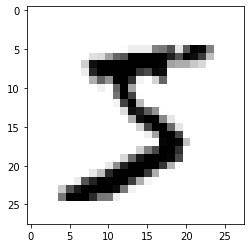

In [9]:
import matplotlib.pyplot as plt

digit = train_images[0]

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [0]:
val_images = train_images[50000:]
val_labels = train_labels[50000:]
train_images = train_images[:50000]
train_labels = train_labels[:50000]

In [11]:
train_labels.shape

(50000,)

In [0]:
# shape 변경
train_data = train_images.reshape((50000, 28 * 28))
val_data = val_images.reshape((10000, 28 * 28))
test_data = test_images.reshape((10000, 28 * 28))

In [0]:
#스케일링
train_data = train_data.astype('float32')/255
val_data = val_data.astype('float32')/255
test_data = test_data.astype('float32')/255

In [0]:
#target 변수 범주화
from keras.utils import to_categorical

In [0]:
train_labels = to_categorical(train_labels)
val_labels = to_categorical(val_labels)
test_labels = to_categorical(test_labels)

In [16]:
print(train_data.shape)
print(train_labels.shape)
print(val_data.shape)
print(val_data.shape)

(50000, 784)
(50000, 10)
(10000, 784)
(10000, 784)


In [0]:
from keras import models, layers

In [18]:
model = models.Sequential()

model.add(layers.Dense(512, activation = 'relu',
                     input_shape=(28* 28,)))

# target 개수 맞춰 output
model.add(layers.Dense(10, activation='softmax'))
#옵티마이저, 손실함수, 모니터링 지표
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
from keras.callbacks import EarlyStopping, ModelCheckpoint
file_path = 'save_best'
checkpoint = ModelCheckpoint(file_path, monitor = 'val_loss', verbose = 1, save_best_only=True)
early_stop = EarlyStopping(monitor = 'val_loss', patience = 30)

In [25]:
#모델 학습 early stop
hist = model.fit(train_data, train_labels, epochs=100, batch_size = 128, validation_data =(val_data, val_labels),
                callbacks=[early_stop])

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 2s 41us/step - loss: 1.2568e-07 - acc: 1.0000 - val_loss: 0.1328 - val_acc: 0.9833
Epoch 2/100
50000/50000 [==============================] - 2s 39us/step - loss: 1.2524e-07 - acc: 1.0000 - val_loss: 0.1326 - val_acc: 0.9834
Epoch 3/100
50000/50000 [==============================] - 2s 39us/step - loss: 1.2486e-07 - acc: 1.0000 - val_loss: 0.1327 - val_acc: 0.9833
Epoch 4/100
50000/50000 [==============================] - 2s 40us/step - loss: 1.2448e-07 - acc: 1.0000 - val_loss: 0.1325 - val_acc: 0.9833
Epoch 5/100
50000/50000 [==============================] - 2s 39us/step - loss: 1.2416e-07 - acc: 1.0000 - val_loss: 0.1329 - val_acc: 0.9834
Epoch 6/100
50000/50000 [==============================] - 2s 39us/step - loss: 1.2388e-07 - acc: 1.0000 - val_loss: 0.1330 - val_acc: 0.9834
Epoch 7/100
50000/50000 [==============================] - 2s 40us/step - loss: 1.2363e-07 - acc: 

In [0]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

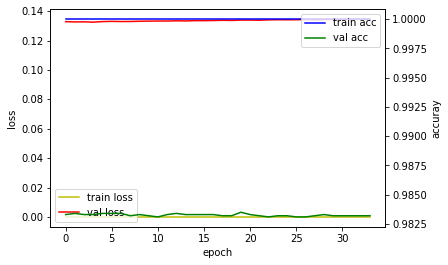

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
def train_process_plot(hist):
  fig, loss_ax = plt.subplots()
  
  acc_ax = loss_ax.twinx()
  
  loss_ax.plot(hist.history['loss'], 'y', label='train loss')
  loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
  
  acc_ax.plot(hist.history['acc'], 'b', label='train acc')
  acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
  
  loss_ax.set_xlabel('epoch')
  loss_ax.set_ylabel('loss')
  acc_ax.set_ylabel('accuray')
  
  loss_ax.legend(loc='lower left')
  acc_ax.legend(loc='upper right')
  
  plt.show()
  
train_process_plot(hist)

# 모델 저장 및 test set 성능 확인

In [0]:
from keras.models import load_model

In [0]:
model.save('mnist_mlp_model.h5')
model = load_model('mnist_mlp_model.h5')

loss_and_metrics = model.evaluate(test_data, test_labels, batch_size=32)

print("")
print('loss : ' + str(loss_and_metrics[0]))
print('accuray :' + str(loss_and_metrics[1]))

10000/10000 [==============================] - 1s 57us/step

loss : [0.12829866186790503, 0.9831]
accuray :0.9831


In [0]:
digit = test_images[10]


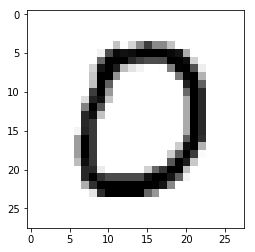

In [0]:
plt.imshow(digit, cmap=plt.cm.binary)

In [0]:
model.predict_classes(test_data)[10]

0